# Fourier Series are Beautiful

Fourier series are powerful function and signal representation, capable of representing
any periodic bandlimited signal. Understanding the representation can be tricky, but is
greatly helped by visualising individual components of the series, which is what we'll do
here.

Citing <a href="https://en.wikipedia.org/wiki/Fourier_series">Wikipedia</a>: A Fourier
series is a periodic function composed of harmonically related sinusoids comined by a
weighted summation. With appropriate weights, one cycle (or period) of the summation can
be made to approximate as arbitrary function in that interval, or the entire function if
it itself is periodic.

The fourier series representation of a function (Exponential Form) is given by:

$$x_{T}(t)=\sum_{n=-\infty}^{\infty} c_{n} e^{j n \omega_{0} t}$$

Where:
* $\omega_{0}$ is the fundamental frequency
* $n$ is an integer representing the harmonics of $\omega_{0}$
* $c_n$ are the coefficients of the infinite series

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

A = 1 # @param
Tp = 0.5 # @param
wo = 0.5 # @param
wo = wo*2*math.pi
N = 20 # @param
c = [(A/(math.pi*(n+1)))*math.sin((n+1)*wo*(Tp/2)) for n in range(0,N)]

## Square Waves

Let's start with an informative example - representing a Square Wave by it's fourier
series, this is an interesting example, as how can smooth sinusoids approximate a function
containing discrete steps?

The coefficients of the fourier series for the square wave are given by the following
expression, each coefficient $c_n$ determining the contribution of a sinusoid at the given
frequency $n\omega_{0}$.

$$c_n = \frac{A}{\pi n} \sin \left(n \omega_{0} \frac{T_{p}}{2}\right)$$

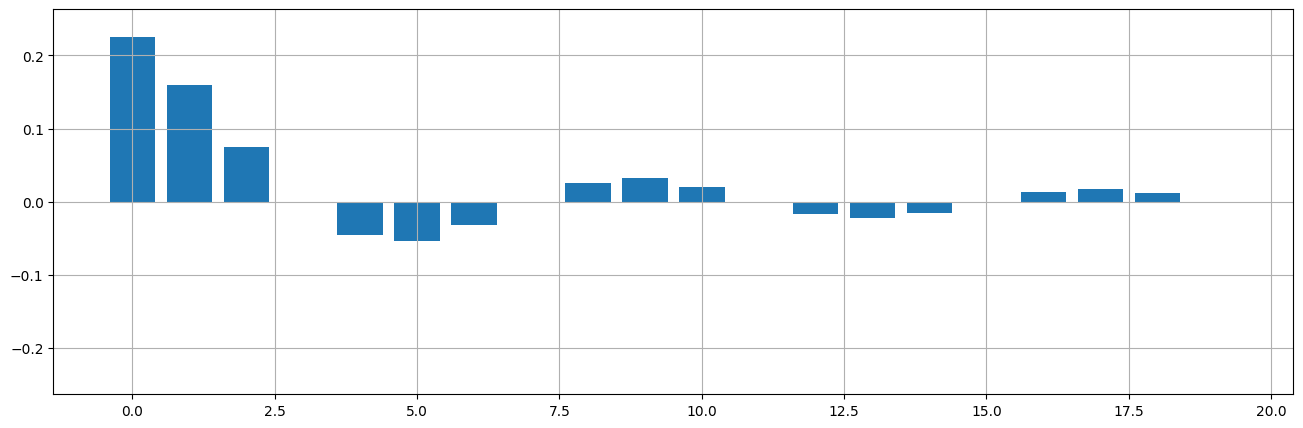

In [2]:
plt.figure(figsize=(16,5))
plt.bar(range(0,len(c)), c)
plt.grid()
mm = 1.1*np.max(np.abs(plt.ylim()))
plt.ylim(-mm,mm);

## The Composite Signal

Given the value of $\omega_{0}$ is X, $T_p$ is X and $A$ is Y the first ($N$) will produce a function approximating the square as shown below.


So it turns out that we need quite a lot of components to approximate the square wave well, try setting the current value of $N=$ X to the maximum of 100. The number of components has a significant impact of the final signal and we would need the full infiite series in order to converge to a true square wave with instantaneous value changes.

The parameter $A$ controls amplitude and has no influence on the structure of the approximation, try changing it to see, A: X.

The parameters $\omega_{0}$ (X) and $T_p$ (X) have the greatest influence on the waveform shape, controlling the periodicity, duty cycle and rate convergence of the representation to the target waveform. try adjustuing these in tandem so see how the waveform is affected.

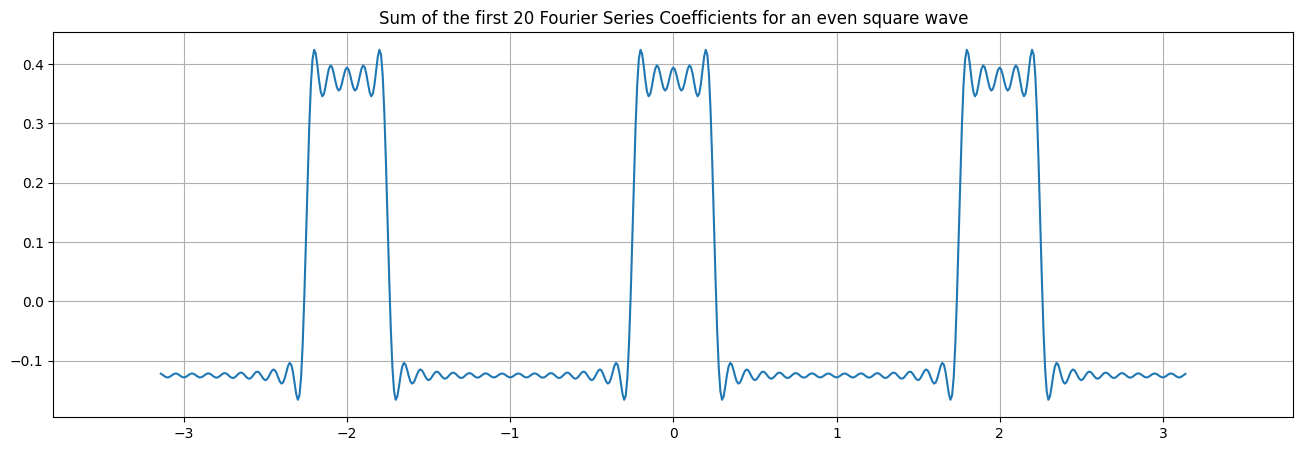

In [5]:
#| label: fig-n-component-square

t = np.arange(-math.pi,math.pi,0.01)

X = np.zeros((N, t.shape[0]))
for n in range(0,N):
    X[n, :] = np.real(c[n]*np.exp(-1j*(n+1)*wo*t))
    
Xs = np.sum(X, axis=0);
plt.figure(figsize=(16,5))
plt.plot(t,Xs)
plt.grid()
plt.xlim(-3.8,3.8)
plt.title(f'Sum of the first {N} Fourier Series Coefficients for an even square wave');

## The Series Components

If you've played with the paramrters above for a while, you may have noticed something about $\omega_{0}$, known as the fundamental frequency, this controls the capacity the series has to represent a function in a given number of compontents. The square wave example we have chosen in particular requires high frequency components in order to be able to represent the discontinuities at step edges.

At lower values of $\omega_{0}$ the base frequency of the sinusoids become so low that The time to converge to a reasonable approximation increases significantly.

Try setting $\omega_{0}$ to values below $0.1$ and watch what happends to the components used to construct the signal,
$\omega_{0}$: W.

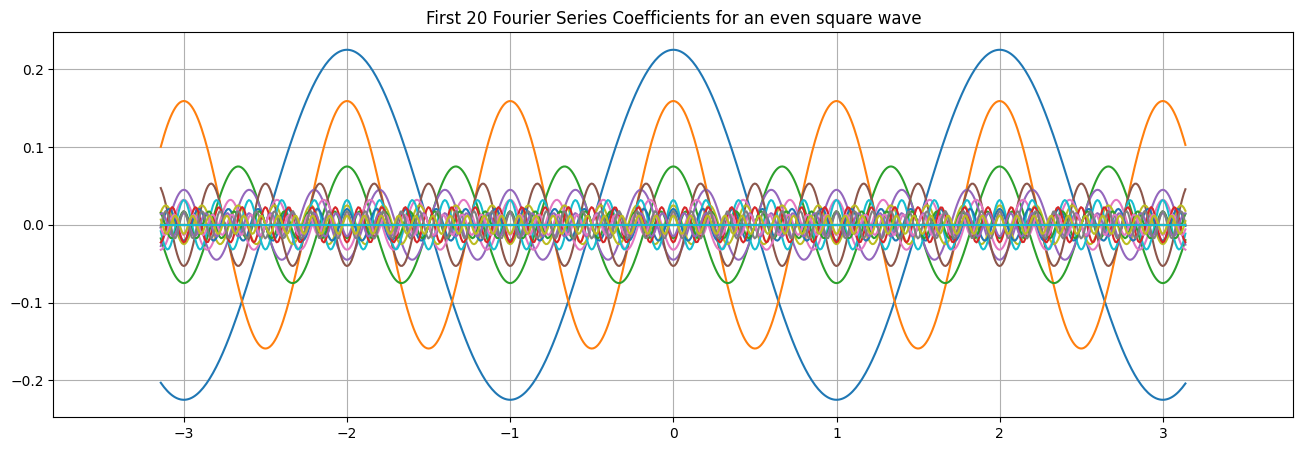

In [6]:
#| label: fig-n-components

t = np.arange(-math.pi,math.pi,0.01)

X = np.zeros((N, t.shape[0]))
for n in range(0,N):
    X[n, :] = np.real(c[n]*np.exp(-1j*(n+1)*wo*t))

plt.figure(figsize=(16,5))
plt.plot(t,X.T)
plt.grid()
plt.xlim(-3.8,3.8)
plt.title(f'First {N} Fourier Series Coefficients for an even square wave');
if N < 15:
    plt.legend(labels=[f'C{n}' for n in range(0,N)])